In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ansh18mittal","key":"1209801676f83afdfc94784b114bc658"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
thomaskonstantin/highly-rated-children-books-and-stories  Highly Rated Children Books And Stories            106KB  2020-10-24 12:09:59            124  
rishidamarla/judicial-expenditures-across-all-50-states   Judicial Expenditures across all 50 States           2KB  2020-10-25 00:07:45             87  
kanishk307/6000-indian-food-recipes-dataset               6000+ Indian Food Recipes Dataset                    9MB  2020-10-24 01:08:23            170  
balraj98/synthetic-objective-testing-set-sots-reside      Synthetic Objective Testing Set (SOTS) [RESIDE]    415MB  2020-10-24 10:07:29             10  
salmaneunus/mechanical-tools-dataset                      Mechanical Tools Classif

In [ ]:
! kaggle competitions download -c 'Titanic'

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.11MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 43.0MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.8MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test['Survived'] = ''

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


## Feature Transformation and Engineering

In [ ]:
train_test_data = [train, test] # combine
for dataset in train_test_data: 
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
train.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [ ]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Sir           1
Capt          1
Ms            1
Countess      1
Don           1
Lady          1
Mme           1
Name: Title, dtype: int64

In [ ]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [ ]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master':3, 'Dr': 3,  'Rev': 3, 'Col': 3, 'Mlle':3, 'Major': 3, 'Don': 3, 'Jonkheer': 3, 
                 'Lady':3, 'Ms': 3, 'Countess': 3, 'Capt': 3, 'Mme': 3, 'Sir': 3, 'Dona': 3}

In [ ]:
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
dataset[dataset.Title.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title


In [ ]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [ ]:
gender_mapping = {'male':0, 'female': 1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(gender_mapping)

In [ ]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)

In [ ]:
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
for dataset in train_test_data:
  # dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  # dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  # dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  #   dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  #   dataset.loc[ dataset['Age'] > 64, 'Age']

  dataset.loc[ dataset['Age'] <= 16 , 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 62 , 'Age'] = 4

In [ ]:
train.Age.value_counts()

2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: Age, dtype: int64

In [ ]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
train_test_data

[     PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
 0              1         0       3    0  ...   7.2500    NaN         0     0
 1              2         1       1    1  ...  71.2833    C85         1     2
 2              3         1       3    1  ...   7.9250    NaN         0     1
 3              4         1       1    1  ...  53.1000   C123         0     2
 4              5         0       3    0  ...   8.0500    NaN         0     0
 ..           ...       ...     ...  ...  ...      ...    ...       ...   ...
 886          887         0       2    0  ...  13.0000    NaN         0     3
 887          888         1       1    1  ...  30.0000    B42         0     1
 888          889         0       3    1  ...  23.4500    NaN         0     1
 889          890         1       1    0  ...  30.0000   C148         1     0
 890          891         0       3    0  ...   7.7500    NaN         2     0
 
 [891 rows x 12 columns],
      PassengerId  Pclass  Sex  Age 

In [ ]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [ ]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [ ]:
train.Fare.isnull().sum()

0

In [ ]:
for dataset in train_test_data: 
  dataset.loc[(dataset['Fare'] <= 17), 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

In [ ]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

In [ ]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [ ]:
cabin_mapping = {'A':0, 'B':1, 'C':2,'D':3, 'E':4, 'F':5, 'G':6, 'T':7}
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


In [ ]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [ ]:
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [ ]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:1.8, 7:2, 8:2.4, 9:2.8, 10:3.2, 11:3.4}
for dataset in train_test_data:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,5.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,2.0,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,5.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,2.0,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,5.0,0,0,0.0


In [ ]:
features_drop = ['Ticket','SibSp','Parch']
train.drop(features_drop, axis = 1, inplace = True)
test.drop(features_drop, axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,5.0,0,0,0.4
1,2,1,1,1,3.0,2.0,2.0,1,2,0.4
2,3,1,3,1,1.0,0.0,5.0,0,1,0.0
3,4,1,1,1,2.0,2.0,2.0,0,2,0.4
4,5,0,3,0,2.0,0.0,5.0,0,0,0.0


In [ ]:
train.drop(['PassengerId'], axis = 1, inplace = True)

In [ ]:
test.drop(['PassengerId'], axis = 1, inplace = True)

In [ ]:
train_data = train.drop(['Survived'], axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
target.isnull().sum()

0

In [ ]:
train_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

## Modelling

In [ ]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from matplotlib import pyplot

In [ ]:
# List of models
def get_models():
  models= dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()

  return models

In [ ]:
# Evaluate model using CV
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1 )
  scores = cross_val_score(model, train_data, target, scoring = 'accuracy', cv = cv, n_jobs = 1 , error_score = 'raise')
  return scores

>lr 0.817 (0.043) 
>knn 0.826 (0.043) 
>cart 0.800 (0.045) 
>svm 0.829 (0.041) 
>bayes 0.783 (0.042) 


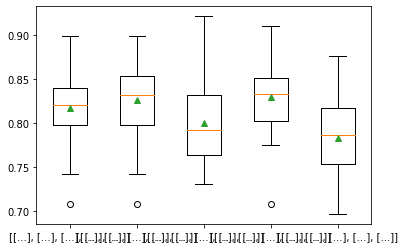

In [ ]:
# model evaluation
models = get_models()
# Evaluation and storing models 
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model)
  results.append(scores)
  names.append(names)
  print('>%s %.3f (%.3f) ' %(name, mean(scores), std(scores)))


# Plot model performance for comparison
pyplot.boxplot(results, labels = names, showmeans = True)
pyplot.show()

## Super Learner

In [ ]:
# Initializing Stacking Ensemble of Models
def get_stacking():
  # Base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('SVM', SVC()))
  level0.append(('bayes', GaussianNB()))
  # Define meta-learner
  level1 = LogisticRegression()
  # Define Stacking Ensemble
  model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 5)
  return model

# Get a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models

In [ ]:
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1 )
  scores = cross_val_score(model, train_data, target, scoring = 'accuracy', cv = cv, n_jobs = 1 , error_score = 'raise')
  return scores

In [ ]:
models = get_models()

>lr 0.817 (0.043) 
>knn 0.826 (0.043) 
>cart 0.799 (0.044) 
>svm 0.829 (0.041) 
>bayes 0.783 (0.042) 
>stacking 0.830 (0.038) 


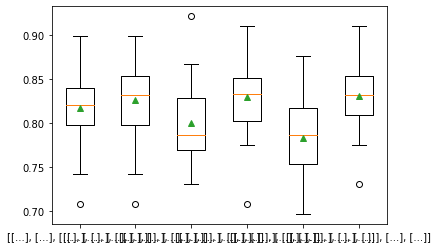

In [ ]:
# Evaluation and storing models 
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model)
  results.append(scores)
  names.append(names)
  print('>%s %.3f (%.3f) ' %(name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.boxplot(results, labels = names, showmeans = True)
pyplot.show()

In [ ]:
target = target.replace(0, 'DIED')
target = target.replace(1, 'SURVIVED')

In [ ]:
target.head()

0        DIED
1    SURVIVED
2    SURVIVED
3    SURVIVED
4        DIED
Name: Survived, dtype: object

In [ ]:
!pip install h2o

     |████████████████████████████████| 129.4MB 68kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=5a8e73a000d4d786dc72506e3c513565fb1a5edab786db0fa1830db11fa3f15e
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [ ]:
!pip install h2o

In [ ]:
h2o_df = pd.concat([train_data, target], axis = 1)

In [ ]:
h2o_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Survived
0,3,0,1.0,0.0,5.0,0,0,0.4,DIED
1,1,1,3.0,2.0,2.0,1,2,0.4,SURVIVED
2,3,1,1.0,0.0,5.0,0,1,0.0,SURVIVED
3,1,1,2.0,2.0,2.0,0,2,0.4,SURVIVED
4,3,0,2.0,0.0,5.0,0,0,0.0,DIED


In [ ]:
h2o_df.to_csv('h2o_df.csv', index = False, header= True)

# Stacked Ensembles using H2O

In [ ]:
import h2o 

In [ ]:
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 25 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_vy9vq1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data_path = r'h2o_df.csv'

In [ ]:
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
y = 'Survived'
x = df.columns

In [ ]:
aml = H2OAutoML(max_models=20, seed  = 1)

In [ ]:
aml.train(x= x, y= y, training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
lm = aml.leaderboard

In [ ]:
lm.head(20)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20201029_100221,0.870184,0.409142,0.85034,0.178291,0.353251,0.124787
XGBoost_3_AutoML_20201029_100221,0.870128,0.41045,0.846835,0.178986,0.35328,0.124807
GBM_grid__1_AutoML_20201029_100221_model_2,0.869718,0.413779,0.849823,0.179753,0.356462,0.127065
GBM_grid__1_AutoML_20201029_100221_model_1,0.869292,0.408579,0.85126,0.176877,0.353923,0.125261
GBM_1_AutoML_20201029_100221,0.868895,0.408997,0.853588,0.169495,0.351997,0.123902
XGBoost_1_AutoML_20201029_100221,0.868695,0.406757,0.853878,0.170693,0.352297,0.124113
XGBoost_grid__1_AutoML_20201029_100221_model_1,0.868653,0.409863,0.849872,0.177308,0.353331,0.124843
XGBoost_grid__1_AutoML_20201029_100221_model_3,0.868597,0.410089,0.844994,0.17563,0.354718,0.125825
GBM_2_AutoML_20201029_100221,0.868181,0.410924,0.850349,0.181215,0.35411,0.125394
DeepLearning_grid__2_AutoML_20201029_100221_model_1,0.867164,0.417587,0.843647,0.181095,0.356362,0.126994


In [ ]:
# Get model ids for all models in automl leaderboard
models_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
# Getting the 'All Models' Stacked ensemble model
se = h2o.get_model([mid for mid in models_ids if 'StackedEnsemble_AllModels' in mid][0])

In [ ]:
# Get the stacked ensemble model
metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
metalearner.coef_norm()

{'DRF_1_AutoML_20201029_100221': 0.01097590221073363,
 'DeepLearning_1_AutoML_20201029_100221': 0.1411195935518828,
 'DeepLearning_grid__1_AutoML_20201029_100221_model_1': 0.0,
 'DeepLearning_grid__2_AutoML_20201029_100221_model_1': 0.47410012513972905,
 'GBM_1_AutoML_20201029_100221': 0.7982987030331005,
 'GBM_2_AutoML_20201029_100221': 0.0,
 'GBM_3_AutoML_20201029_100221': 0.0,
 'GBM_4_AutoML_20201029_100221': 0.0,
 'GBM_5_AutoML_20201029_100221': 0.0,
 'GBM_grid__1_AutoML_20201029_100221_model_1': 0.0,
 'GBM_grid__1_AutoML_20201029_100221_model_2': 0.015459097185988578,
 'GLM_1_AutoML_20201029_100221': 0.18094081158307257,
 'Intercept': -0.5791172225619503,
 'XGBoost_1_AutoML_20201029_100221': 0.32164440526625077,
 'XGBoost_2_AutoML_20201029_100221': 0.0,
 'XGBoost_3_AutoML_20201029_100221': 0.0,
 'XGBoost_grid__1_AutoML_20201029_100221_model_1': 7.694859510902872e-05,
 'XGBoost_grid__1_AutoML_20201029_100221_model_2': 0.02017506231057161,
 'XGBoost_grid__1_AutoML_20201029_100221_mo

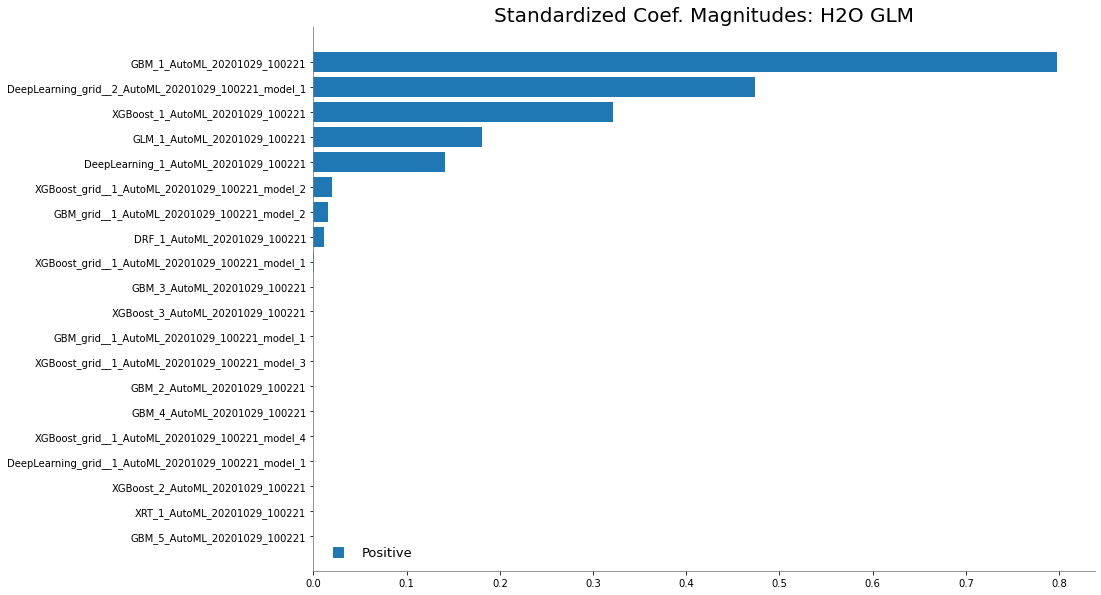

In [ ]:
% matplotlib inline
metalearner.std_coef_plot()

In [ ]:
titanic_h2o = h2o.get_model('DeepLearning_grid__1_AutoML_20201029_100221_model_1')

In [ ]:
titanic_h2o

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20201029_100221_model_1


Status of Neuron Layers: predicting Survived, 2-class classification, bernoulli distribution, CrossEntropy loss, 2,202 weights/biases, 31.6 KB, 1,256,310 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,20,,,,,,,,,
1,,2,200,RectifierDropout,40,0,0,0.00954414,0.0180703,0,0.00355711,0.399619,-1.13764,0.396952
2,,3,2,Softmax,,0,0,0.034662,0.0591346,0,0.00945164,1.113,0.0712233,0.310276




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.09713744313473702
RMSE: 0.31166880359563903
LogLoss: 0.3269388477432748
Mean Per-Class Error: 0.1321301888601285
AUC: 0.9219793564055859
AUCPR: 0.9100340967710254
Gini: 0.8439587128111719

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2618228940805156: 


,,DIED,SURVIVED,Error,Rate
0,DIED,489.0,60.0,0.1093,(60.0/549.0)
1,SURVIVED,53.0,289.0,0.155,(53.0/342.0)
2,Total,542.0,349.0,0.1268,(113.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.618229e-01,0.836469,209.0
1,max f2,2.184520e-01,0.853379,218.0
2,max f0point5,6.136147e-01,0.875887,171.0
3,max accuracy,5.460143e-01,0.873176,175.0
4,max precision,9.999950e-01,1.000000,0.0
5,max recall,9.536158e-04,1.000000,340.0
6,max specificity,9.999950e-01,1.000000,0.0
7,max absolute_mcc,2.618229e-01,0.733012,209.0
8,max min_per_class_accuracy,2.269385e-01,0.862573,215.0
9,max mean_per_class_accuracy,2.618229e-01,0.867870,209.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 35.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,9.999621e-01,2.605263,2.605263,1.000000,0.999986,1.000000,0.999986,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,9.999024e-01,2.605263,2.605263,1.000000,0.999940,1.000000,0.999963,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,9.997560e-01,2.605263,2.605263,1.000000,0.999837,1.000000,0.999921,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.041526,9.995104e-01,2.605263,2.605263,1.000000,0.999614,1.000000,0.999838,0.029240,0.108187,160.526316,160.526316,0.108187
4,5,0.051627,9.992456e-01,2.605263,2.605263,1.000000,0.999348,1.000000,0.999742,0.026316,0.134503,160.526316,160.526316,0.134503
5,6,0.101010,9.891161e-01,2.605263,2.605263,1.000000,0.996151,1.000000,0.997987,0.128655,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,9.269056e-01,2.486842,2.566379,0.954545,0.958929,0.985075,0.985162,0.122807,0.385965,148.684211,156.637863,0.382322
7,8,0.200898,8.742817e-01,2.431579,2.532490,0.933333,0.902000,0.972067,0.964255,0.122807,0.508772,143.157895,153.249044,0.499664
8,9,0.301908,5.946398e-01,2.142105,2.401878,0.822222,0.774337,0.921933,0.900714,0.216374,0.725146,114.210526,140.187830,0.686895
9,10,0.400673,2.426346e-01,1.273026,2.123618,0.488636,0.389314,0.815126,0.774654,0.125731,0.850877,27.302632,112.361787,0.730659




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.13881889928045893
RMSE: 0.3725840835039239
LogLoss: 0.45444550218469115
Mean Per-Class Error: 0.19854280510018218
AUC: 0.8661814676338692
AUCPR: 0.830660534615612
Gini: 0.7323629352677383

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5767449134550704: 


,,DIED,SURVIVED,Error,Rate
0,DIED,483.0,66.0,0.1202,(66.0/549.0)
1,SURVIVED,95.0,247.0,0.2778,(95.0/342.0)
2,Total,578.0,313.0,0.1807,(161.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.576745,0.754198,169.0
1,max f2,0.132822,0.807403,289.0
2,max f0point5,0.758778,0.821060,126.0
3,max accuracy,0.743359,0.832772,130.0
4,max precision,0.995659,0.977273,9.0
5,max recall,0.012994,1.000000,390.0
6,max specificity,0.999813,0.998179,0.0
7,max absolute_mcc,0.743359,0.643087,130.0
8,max min_per_class_accuracy,0.297137,0.781421,226.0
9,max mean_per_class_accuracy,0.738303,0.801457,132.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 40.43 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,9.995679e-01,2.315789,2.315789,0.888889,0.999737,0.888889,0.999737,0.023392,0.023392,131.578947,131.578947,0.021570
1,2,0.020202,9.989280e-01,2.605263,2.460526,1.000000,0.999285,0.944444,0.999511,0.026316,0.049708,160.526316,146.052632,0.047886
2,3,0.030303,9.974030e-01,2.605263,2.508772,1.000000,0.998096,0.962963,0.999039,0.026316,0.076023,160.526316,150.877193,0.074202
3,4,0.040404,9.962379e-01,2.605263,2.532895,1.000000,0.996867,0.972222,0.998496,0.026316,0.102339,160.526316,153.289474,0.100518
4,5,0.050505,9.949099e-01,2.605263,2.547368,1.000000,0.995771,0.977778,0.997951,0.026316,0.128655,160.526316,154.736842,0.126833
5,6,0.101010,9.834214e-01,2.489474,2.518421,0.955556,0.989466,0.966667,0.993708,0.125731,0.254386,148.947368,151.842105,0.248921
6,7,0.150393,9.590124e-01,2.190789,2.410841,0.840909,0.970144,0.925373,0.985971,0.108187,0.362573,119.078947,141.084053,0.344358
7,8,0.200898,9.208188e-01,2.373684,2.401500,0.911111,0.940709,0.921788,0.974592,0.119883,0.482456,137.368421,140.149956,0.456955
8,9,0.301908,7.294660e-01,1.881579,2.227548,0.722222,0.834594,0.855019,0.927753,0.190058,0.672515,88.157895,122.754842,0.601476
9,10,0.400673,4.024637e-01,0.888158,1.897391,0.340909,0.571159,0.728291,0.839853,0.087719,0.760234,-11.184211,89.739054,0.583549




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8237964,0.036947656,0.82122904,0.8820225,0.7921348,0.83146065,0.7921348
1,auc,0.8675581,0.031636834,0.90361685,0.88538814,0.8214572,0.8743832,0.8529451
2,aucpr,0.8362578,0.047918834,0.87930447,0.8738699,0.7600043,0.8272407,0.84086967
3,err,0.17620362,0.036947656,0.17877094,0.11797753,0.20786516,0.16853933,0.20786516
4,err_count,31.4,6.5802736,32.0,21.0,37.0,30.0,37.0
5,f0point5,0.7656405,0.065707676,0.7425743,0.88145894,0.734375,0.75,0.71979433
6,f1,0.77760655,0.048010647,0.7894737,0.84671533,0.71755725,0.7826087,0.7516779
7,f2,0.7926989,0.054740123,0.8426966,0.8146067,0.70149255,0.8181818,0.78651685
8,lift_top_group,2.6098633,0.12274331,2.6323528,2.4383562,2.6176472,2.78125,2.5797102
9,logloss,0.4545244,0.07343928,0.3842344,0.43206733,0.5750713,0.41602424,0.4652247



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-10-29 10:04:21,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-29 10:04:21,1 min 23.564 sec,26205 obs/sec,10.0,1,8910.0,0.376112,0.461445,0.401876,0.841131,0.818513,2.605263,0.170595
2,,2020-10-29 10:04:27,1 min 28.693 sec,44133 obs/sec,270.0,27,240570.0,0.332703,0.364731,0.531973,0.903189,0.888067,2.605263,0.144781
3,,2020-10-29 10:04:32,1 min 33.715 sec,50261 obs/sec,590.0,59,525690.0,0.322447,0.349128,0.560384,0.911620,0.897952,2.605263,0.143659
4,,2020-10-29 10:04:37,1 min 38.816 sec,56747 obs/sec,990.0,99,882090.0,0.317471,0.339034,0.573847,0.915492,0.904289,2.605263,0.135802
5,,2020-10-29 10:04:42,1 min 43.824 sec,60305 obs/sec,1390.0,139,1238490.0,0.314330,0.330231,0.582240,0.920898,0.907529,2.605263,0.140292
6,,2020-10-29 10:04:42,1 min 44.079 sec,60460 obs/sec,1410.0,141,1256310.0,0.311669,0.326939,0.589282,0.921979,0.910034,2.605263,0.126824



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,FamilySize,1.000000,1.000000,0.186729
1,Fare,0.813542,0.813542,0.151912
2,Title,0.739490,0.739490,0.138084
3,Age,0.696500,0.696500,0.130057
4,Embarked,0.605174,0.605174,0.113004
5,Sex,0.589716,0.589716,0.110117
6,Pclass,0.477010,0.477010,0.089072
7,Cabin,0.433919,0.433919,0.081025


In [ ]:
titanic_h2o_gbm = h2o.get_model('GLM_1_AutoML_20201029_100221')

In [ ]:
titanic_h2o_gbm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20201029_100221


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.003095 ),"nlambda = 30, lambda.max = 26.409, lambda.min = 0.003095, lambda.1...",8,8,36,automl_training_h2o_df.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13250793882967488
RMSE: 0.36401639912190065
LogLoss: 0.4235718886191464
Null degrees of freedom: 890
Residual degrees of freedom: 882
Null deviance: 1186.6551368246774
Residual deviance: 754.805105519319
AIC: 772.805105519319
AUC: 0.8698803779332971
AUCPR: 0.8431294953818151
Gini: 0.7397607558665942

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4708189080042131: 


,,DIED,SURVIVED,Error,Rate
0,DIED,478.0,71.0,0.1293,(71.0/549.0)
1,SURVIVED,87.0,255.0,0.2544,(87.0/342.0)
2,Total,565.0,326.0,0.1773,(158.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.470819,0.763473,206.0
1,max f2,0.111683,0.808522,317.0
2,max f0point5,0.710311,0.804647,133.0
3,max accuracy,0.580121,0.827160,175.0
4,max precision,0.988181,1.000000,0.0
5,max recall,0.048118,1.000000,355.0
6,max specificity,0.988181,1.000000,0.0
7,max absolute_mcc,0.580121,0.628954,175.0
8,max min_per_class_accuracy,0.380941,0.798246,231.0
9,max mean_per_class_accuracy,0.470819,0.808144,206.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.963851,2.605263,2.605263,1.000000,0.976625,1.000000,0.976625,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.956094,2.605263,2.605263,1.000000,0.959708,1.000000,0.968167,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.948941,2.605263,2.605263,1.000000,0.954242,1.000000,0.963525,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.941615,2.605263,2.605263,1.000000,0.946249,1.000000,0.959206,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.051627,0.937112,2.344737,2.548627,0.900000,0.938163,0.978261,0.954631,0.026316,0.131579,134.473684,154.862700,0.129757
5,6,0.101010,0.874991,2.486842,2.518421,0.954545,0.913190,0.966667,0.934371,0.122807,0.254386,148.684211,151.842105,0.248921
6,7,0.150393,0.817382,2.368421,2.469167,0.909091,0.842881,0.947761,0.904330,0.116959,0.371345,136.842105,146.916732,0.358595
7,8,0.214366,0.746875,2.193906,2.387021,0.842105,0.768264,0.916230,0.863724,0.140351,0.511696,119.390582,138.702122,0.482552
8,9,0.300786,0.626855,1.725564,2.196976,0.662338,0.677837,0.843284,0.810316,0.149123,0.660819,72.556391,119.697565,0.584316
9,10,0.405163,0.406219,1.064516,1.905234,0.408602,0.507292,0.731302,0.732252,0.111111,0.771930,6.451613,90.523400,0.595245




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1349549719317679
RMSE: 0.3673621808675573
LogLoss: 0.4307979120673843
Null degrees of freedom: 890
Residual degrees of freedom: 882
Null deviance: 1187.2107056621167
Residual deviance: 767.6818793040788
AIC: 785.6818793040788
AUC: 0.8649884425696908
AUCPR: 0.8355652505593874
Gini: 0.7299768851393815

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4907217071560022: 


,,DIED,SURVIVED,Error,Rate
0,DIED,479.0,70.0,0.1275,(70.0/549.0)
1,SURVIVED,91.0,251.0,0.2661,(91.0/342.0)
2,Total,570.0,321.0,0.1807,(161.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.490722,0.757164,186.0
1,max f2,0.124025,0.805041,335.0
2,max f0point5,0.677752,0.804878,123.0
3,max accuracy,0.598203,0.821549,150.0
4,max precision,0.988043,1.000000,0.0
5,max recall,0.042061,1.000000,387.0
6,max specificity,0.988043,1.000000,0.0
7,max absolute_mcc,0.598203,0.616728,150.0
8,max min_per_class_accuracy,0.376334,0.795322,227.0
9,max mean_per_class_accuracy,0.490722,0.803207,186.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.28 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.964671,2.605263,2.605263,1.000000,0.975581,1.000000,0.975581,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.956325,2.605263,2.605263,1.000000,0.960027,1.000000,0.967804,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.951510,2.315789,2.508772,0.888889,0.953989,0.962963,0.963199,0.023392,0.076023,131.578947,150.877193,0.074202
3,4,0.040404,0.940117,2.605263,2.532895,1.000000,0.946042,0.972222,0.958910,0.026316,0.102339,160.526316,153.289474,0.100518
4,5,0.050505,0.933879,2.605263,2.547368,1.000000,0.936985,0.977778,0.954525,0.026316,0.128655,160.526316,154.736842,0.126833
5,6,0.101010,0.874080,2.431579,2.489474,0.933333,0.909332,0.955556,0.931928,0.122807,0.251462,143.157895,148.947368,0.244176
6,7,0.150393,0.797982,2.368421,2.449725,0.909091,0.835847,0.940299,0.900379,0.116959,0.368421,136.842105,144.972506,0.353849
7,8,0.203143,0.742973,2.217245,2.389357,0.851064,0.767835,0.917127,0.865962,0.116959,0.485380,121.724524,138.935737,0.458058
8,9,0.300786,0.619468,1.706897,2.167812,0.655172,0.681510,0.832090,0.806084,0.166667,0.652047,70.689655,116.781225,0.570080
9,10,0.400673,0.407595,1.141632,1.911986,0.438202,0.512227,0.733894,0.732825,0.114035,0.766082,14.163217,91.198585,0.593040




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.82041305,0.032841496,0.8324022,0.8651685,0.80898875,0.8202247,0.7752809
1,auc,0.8666694,0.036961723,0.9052067,0.8851272,0.8375,0.8874041,0.8181093
2,aucpr,0.8366366,0.04206378,0.8861763,0.8678945,0.78672737,0.83960754,0.80277723
3,err,0.17958696,0.032841496,0.16759777,0.13483146,0.19101124,0.17977528,0.2247191
4,err_count,32.0,5.8309517,30.0,24.0,34.0,32.0,40.0
5,f0point5,0.76056504,0.052327424,0.75757575,0.84033614,0.7705479,0.7361111,0.69825435
6,f1,0.7728196,0.04451805,0.8,0.8333333,0.7258065,0.76811594,0.7368421
7,f2,0.7885708,0.06267272,0.84745765,0.8264463,0.6859756,0.8030303,0.7799443
8,lift_top_group,2.6098633,0.12274331,2.6323528,2.4383562,2.6176472,2.78125,2.5797102
9,logloss,0.42774895,0.050477464,0.37686583,0.3969554,0.48391488,0.4006637,0.48034495



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-10-29 10:02:27,0.000 sec,2,.26E2,9,1.318053,NaN,1.321505,0.007539,,,,,,,
1,,2020-10-29 10:02:27,0.002 sec,4,.16E2,9,1.310050,NaN,1.315082,0.007446,,,,,,,
2,,2020-10-29 10:02:27,0.005 sec,6,.1E2,9,1.297747,NaN,1.305117,0.007343,,,,,,,
3,,2020-10-29 10:02:27,0.008 sec,8,.63E1,9,1.279345,NaN,1.290004,0.007283,,,,,,,
4,,2020-10-29 10:02:27,0.010 sec,10,.39E1,9,1.252854,NaN,1.267812,0.007435,,,,,,,
5,,2020-10-29 10:02:27,0.012 sec,12,.24E1,9,1.216820,NaN,1.236735,0.008114,,,,,,,
6,,2020-10-29 10:02:27,0.015 sec,14,.15E1,9,1.171294,NaN,1.196004,0.009725,,,,,,,
7,,2020-10-29 10:02:27,0.017 sec,16,.94E0,9,1.118680,NaN,1.146857,0.012451,,,,,,,
8,,2020-10-29 10:02:27,0.019 sec,18,.58E0,9,1.063424,NaN,1.092895,0.016119,,,,,,,
9,,2020-10-29 10:02:27,0.022 sec,20,.36E0,9,1.010580,NaN,1.039076,0.020335,,,,,,,



See the whole table with table.as_data_frame()


In [ ]:
titanic_h2o_xrt = h2o.get_model('XRT_1_AutoML_20201029_100221')

In [ ]:
titanic_h2o_xrt

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_20201029_100221


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,43.0,43.0,64488.0,13.0,20.0,15.813953,69.0,145.0,114.34884




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1354637755568518
RMSE: 0.36805403890848937
LogLoss: 0.5501411665651267
Mean Per-Class Error: 0.18962707314734928
AUC: 0.8535029133245987
AUCPR: 0.8275778556571283
Gini: 0.7070058266491974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39791661500930786: 


,,DIED,SURVIVED,Error,Rate
0,DIED,466.0,83.0,0.1512,(83.0/549.0)
1,SURVIVED,78.0,264.0,0.2281,(78.0/342.0)
2,Total,544.0,347.0,0.1807,(161.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397917,0.766328,197.0
1,max f2,0.156347,0.806100,280.0
2,max f0point5,0.589760,0.796897,139.0
3,max accuracy,0.474718,0.822671,170.0
4,max precision,0.993901,0.983607,4.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.998179,0.0
7,max absolute_mcc,0.458446,0.621117,177.0
8,max min_per_class_accuracy,0.323978,0.795322,222.0
9,max mean_per_class_accuracy,0.397917,0.810373,197.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.050505,1.000000,2.547368,2.547368,0.977778,1.000000,0.977778,1.000000,0.128655,0.128655,154.736842,154.736842,0.126833
1,2,0.050505,0.998866,0.000000,2.547368,0.000000,0.000000,0.977778,1.000000,0.000000,0.128655,-100.000000,154.736842,0.126833
2,3,0.101010,0.974359,2.315789,2.431579,0.888889,0.987237,0.933333,0.993619,0.116959,0.245614,131.578947,143.157895,0.234685
3,4,0.150393,0.912311,2.427632,2.430283,0.931818,0.947273,0.932836,0.978401,0.119883,0.365497,142.763158,143.028280,0.349104
4,5,0.200898,0.825002,2.315789,2.401500,0.888889,0.867934,0.921788,0.950630,0.116959,0.482456,131.578947,140.149956,0.456955
5,6,0.300786,0.589763,1.756357,2.187255,0.674157,0.715905,0.839552,0.872680,0.175439,0.657895,75.635719,118.725452,0.579571
6,7,0.400673,0.380415,1.200177,1.941176,0.460674,0.472480,0.745098,0.772910,0.119883,0.777778,20.017741,94.117647,0.612022
7,8,0.500561,0.188600,0.643998,1.682322,0.247191,0.278890,0.645740,0.674328,0.064327,0.842105,-35.600237,68.232240,0.554309
8,9,0.600449,0.116383,0.321999,1.456026,0.123596,0.136628,0.558879,0.584879,0.032164,0.874269,-67.800118,45.602558,0.444397
9,10,0.700337,0.101561,0.263454,1.285931,0.101124,0.109413,0.493590,0.517064,0.026316,0.900585,-73.654642,28.593117,0.324993




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.12770503764849112
RMSE: 0.3573584162273097
LogLoss: 0.4603655505387714
Mean Per-Class Error: 0.17608570606844975
AUC: 0.8633879781420765
AUCPR: 0.8349551424653301
Gini: 0.7267759562841529

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.359453022480011: 


,,DIED,SURVIVED,Error,Rate
0,DIED,460.0,89.0,0.1621,(89.0/549.0)
1,SURVIVED,65.0,277.0,0.1901,(65.0/342.0)
2,Total,525.0,366.0,0.1728,(154.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359453,0.782486,210.0
1,max f2,0.220806,0.809152,252.0
2,max f0point5,0.712381,0.821596,122.0
3,max accuracy,0.583691,0.831650,155.0
4,max precision,0.995203,0.974359,6.0
5,max recall,0.010833,1.000000,395.0
6,max specificity,1.000000,0.998179,0.0
7,max absolute_mcc,0.407292,0.644489,195.0
8,max min_per_class_accuracy,0.321905,0.817851,222.0
9,max mean_per_class_accuracy,0.359453,0.823914,210.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.028058,1.000000,2.501053,2.501053,0.960000,1.000000,0.960000,1.000000,0.070175,0.070175,150.105263,150.105263,0.068354
1,2,0.031425,0.999130,2.605263,2.512218,1.000000,0.999252,0.964286,0.999920,0.008772,0.078947,160.526316,151.221805,0.077126
2,3,0.040404,0.995589,2.605263,2.532895,1.000000,0.997226,0.972222,0.999321,0.023392,0.102339,160.526316,153.289474,0.100518
3,4,0.050505,0.989368,2.315789,2.489474,0.888889,0.993418,0.955556,0.998140,0.023392,0.125731,131.578947,148.947368,0.122088
4,5,0.101010,0.969448,2.315789,2.402632,0.888889,0.978562,0.922222,0.988351,0.116959,0.242690,131.578947,140.263158,0.229940
5,6,0.150393,0.911460,2.605263,2.469167,1.000000,0.940290,0.947761,0.972570,0.128655,0.371345,160.526316,146.916732,0.358595
6,7,0.200898,0.812597,2.257895,2.416054,0.866667,0.869088,0.927374,0.946555,0.114035,0.485380,125.789474,141.605410,0.461701
7,8,0.306397,0.590136,1.801512,2.204453,0.691489,0.701277,0.846154,0.862100,0.190058,0.675439,80.151176,120.445344,0.598936
8,9,0.400673,0.379959,1.271617,1.984962,0.488095,0.479384,0.761905,0.772049,0.119883,0.795322,27.161654,98.496241,0.640495
9,10,0.500561,0.180577,0.585452,1.705688,0.224719,0.274068,0.654709,0.672676,0.058480,0.853801,-41.454760,70.568799,0.573291




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.83946395,0.03671451,0.877095,0.85955054,0.7921348,0.85955054,0.80898875
1,auc,0.8647381,0.020635406,0.89341545,0.87031966,0.8362299,0.8650631,0.8586624
2,aucpr,0.83915806,0.05555847,0.8886085,0.8779693,0.7523694,0.85918164,0.8176615
3,err,0.16053607,0.03671451,0.12290503,0.14044943,0.20786516,0.14044943,0.19101124
4,err_count,28.6,6.503845,22.0,25.0,37.0,25.0,34.0
5,f0point5,0.7960346,0.06320503,0.8382353,0.86885244,0.7125,0.806962,0.7536232
6,f1,0.7918271,0.036744297,0.8382353,0.8091603,0.7549669,0.8031496,0.7536232
7,f2,0.79023826,0.035289343,0.8382353,0.75714284,0.8028169,0.79937303,0.7536232
8,lift_top_group,2.5226083,0.22679302,2.6323528,2.4383562,2.1813726,2.78125,2.5797102
9,logloss,0.46048197,0.13181522,0.35675192,0.41403165,0.68754977,0.38988376,0.45419273



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-10-29 10:02:47,2.587 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-29 10:02:47,2.639 sec,5.0,0.405182,2.190382,0.812305,0.767697,2.328454,0.248130
2,,2020-10-29 10:02:47,2.682 sec,10.0,0.379652,1.241305,0.840174,0.805372,2.403305,0.178612
3,,2020-10-29 10:02:47,2.723 sec,15.0,0.374296,0.875485,0.848374,0.813623,2.434825,0.200898
4,,2020-10-29 10:02:47,2.757 sec,20.0,0.372800,0.763797,0.850235,0.815378,2.438259,0.195286
5,,2020-10-29 10:02:47,2.790 sec,25.0,0.374166,0.664293,0.848574,0.813033,2.449725,0.195286
6,,2020-10-29 10:02:48,2.824 sec,30.0,0.372627,0.663858,0.848454,0.812606,2.439850,0.186308
7,,2020-10-29 10:02:48,2.858 sec,35.0,0.368357,0.584689,0.854978,0.822819,2.501053,0.178451
8,,2020-10-29 10:02:48,2.896 sec,40.0,0.367572,0.584217,0.852965,0.822331,2.494401,0.180696
9,,2020-10-29 10:02:48,2.920 sec,43.0,0.368054,0.550141,0.853503,0.827578,2.547368,0.180696



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Sex,1422.553711,1.000000,0.306784
1,Title,943.438965,0.663201,0.203459
2,Cabin,543.540710,0.382088,0.117218
3,FamilySize,514.326782,0.361552,0.110918
4,Age,374.912415,0.263549,0.080853
5,Pclass,340.090424,0.239070,0.073343
6,Fare,308.670685,0.216984,0.066567
7,Embarked,189.457993,0.133182,0.040858
